# Projet 4 : Prédiction de la consommation d'électricité
## Exploration
### Objectifs : - prédire les émissions de CO2 et la consommation totale d’énergie (2 variables à prédire)
### Objectif : - évaluer la pertinence de la variable ENERGY STAR Score
### Note à Seattle, le record en nombre d'étages c'est 76 selon wikipedia

### Notes : 
    - Après lecture du dictionnaire des données, les variables redondantes utilisées pour faire des l'imputation puis seront retirées (expression dans une autre unité).
    - Nos variables d'intérets sont: ENERGYSTARScore, TotalGHGEmissions, SiteEnergyUse(kBtu)

In [1]:
#librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [2]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [3]:
dm = pd.read_csv('data_explo.csv')

In [4]:
dm.shape

(3432, 39)

In [5]:
dm.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude
0,1,2016,NONRESIDENTIAL,HOTEL,Mayflower park hotel,0659000030,405 Olive way Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1927,1.0,12.0,88434.0,0.0,88434.0,Hotel,HOTEL,88434.0,NAN,NaN,NAN,NaN,NaN,60.0,7103895.25,2003882.00,3946027.0,1276453.0,NaN,249.705,0,NaN,COMPLIANT,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799
1,2,2016,NONRESIDENTIAL,HOTEL,Paramount Hotel,0659000220,724 Pine street Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1996,1.0,11.0,103566.0,15064.0,88502.0,"Hotel, Parking, Restaurant",HOTEL,83880.0,PARKING,15064.0,RESTAURANT,4622.0,NaN,61.0,8371084.00,0.00,3242851.0,5145082.0,NaN,279.685,0,NaN,COMPLIANT,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393
2,3,2016,NONRESIDENTIAL,HOTEL,5673-The Westin Seattle,0659000475,1900 5th Avenue Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1969,1.0,41.0,959050.0,98359.0,860691.0,Hotel,HOTEL,756868.0,NAN,100000.0,NAN,0.0,NaN,43.0,72858840.00,21566554.00,49526664.0,1493800.0,NaN,2075.380,0,NaN,COMPLIANT,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810
3,5,2016,NONRESIDENTIAL,HOTEL,HOTEL MAX,0659000640,620 STEWART ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1926,1.0,10.0,61320.0,0.0,61320.0,Hotel,HOTEL,61320.0,NAN,NaN,NAN,NaN,NaN,56.0,17511952.00,2214446.25,2768924.0,1811213.0,NaN,1111.385,0,NaN,COMPLIANT,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664
4,8,2016,NONRESIDENTIAL,HOTEL,WARWICK SEATTLE HOTEL (ID8),0659000970,401 LENORA ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1980,1.0,18.0,147735.0,37230.0,110505.0,"Hotel, Parking, Swimming Pool",HOTEL,123445.0,PARKING,68009.0,SWIMMING POOL,0.0,NaN,75.0,14500852.50,0.00,5368607.0,8803998.0,NaN,506.355,0,NaN,COMPLIANT,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047


In [6]:
#importation groupe de varibales
import json
with open('group_var_explo.txt', 'r') as f:
    groupe = json.load(f)

In [7]:
#Rappel du contenu des groupes
for nom, valeur in groupe.items():
    print(nom, ' : ', valeur)

var_id  :  ['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber']
var_quant  :  ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
var_cat  :  ['CouncilDistrictCode', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'DefaultData', 'ComplianceStatus']
var_obj  :  ['ListOfAllPropertyUseTypes']
var_adress  :  ['Latitude', 'Longitude']
var_target  :  ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']


In [8]:
for nom, valeur in groupe.items():
    exec(f'{nom} = {valeur}')

In [9]:
#var_target = 'SiteEnergyUse(kBtu)'

In [10]:
var_quant.remove('PropertyGFAParking')
var_quant

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

### splitting preprocessing

#### Notes : Data will be preprocessed in the aim to get a training set most representative

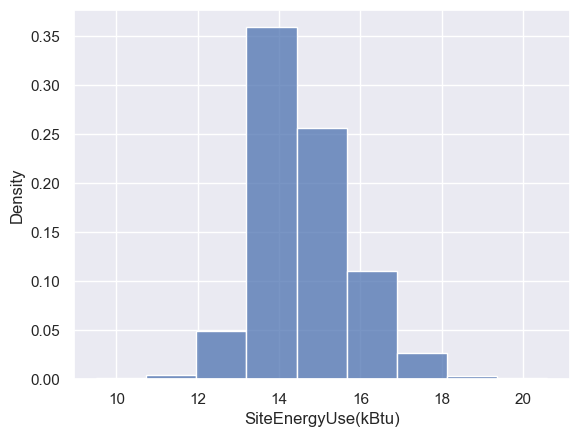

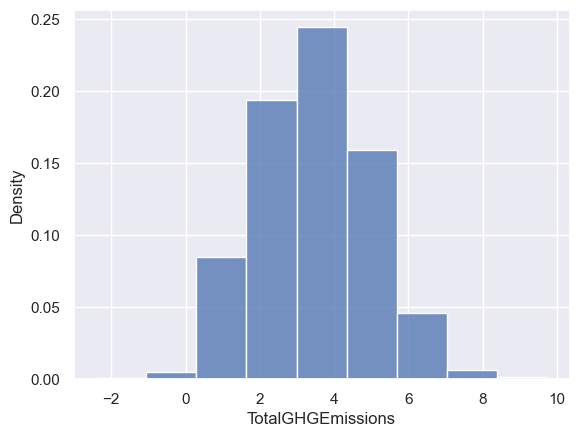

In [11]:
for col in var_target:
    plt.figure()
    sns.histplot(np.log(dm[col]), stat ='density', bins=9)
    plt.show()

#### Notes : 9 bins seems a good tradeoff. We get a plot close to gaussisan distribtution

In [12]:
pd.Series([np.nan,10]).mean()

10.0

In [13]:
dm['group'] = pd.cut(np.log(dm[var_target[1]]), bins=9, labels=[1,2,3,4,5,6,7,8,9])
dm['group'] = np.where(dm['group'].isna(), 10, dm['group'])

In [14]:
dm['group'].value_counts()

5.0     1130
4.0      896
6.0      735
3.0      391
7.0      212
8.0       30
2.0       22
9.0        8
10.0       4
1.0        4
Name: group, dtype: int64

In [15]:
dm['group'].value_counts(normalize=True)*100

5.0     32.925408
4.0     26.107226
6.0     21.416084
3.0     11.392774
7.0      6.177156
8.0      0.874126
2.0      0.641026
9.0      0.233100
10.0     0.116550
1.0      0.116550
Name: group, dtype: float64

In [16]:
## Only 0.11% of instances (group 10) has na as value for target variable

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
df_train, df_test = train_test_split(dm, test_size=0.2, stratify=dm['group'], random_state=3)

In [18]:
dm[[var_target[1]]+var_quant].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TotalGHGEmissions                3428 non-null   float64
 1   YearBuilt                        3432 non-null   int64  
 2   NumberofBuildings                3431 non-null   float64
 3   NumberofFloors                   3415 non-null   float64
 4   PropertyGFATotal                 3432 non-null   float64
 5   PropertyGFABuilding(s)           3432 non-null   float64
 6   LargestPropertyUseTypeGFA        3402 non-null   float64
 7   SecondLargestPropertyUseTypeGFA  1704 non-null   float64
 8   ThirdLargestPropertyUseTypeGFA   607 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 241.4 KB


In [19]:
def imputation_var_qaunt(df, target, var_quant):
    #Deleting nan in target + constant imputer / mean filling
    df = df.dropna(subset=[target])
    #df.loc[:,var_quant] = df[var_quant].fillna(0) #0.24748172444549316
    #df.loc[:,var_quant] = df[var_quant].fillna(1) #0.18045426303198944
    mean_imp = SimpleImputer(strategy='mean')
    df.loc[:,var_quant] = mean_imp.fit_transform(df[var_quant]) #0.2478691762385683
    
    #Filling all missing by a value
    #df = df.fillna(0) #-0.02411149306155791
    #df = df.fillna(-1) #-0.4907763908689512
    #df = df.fillna(500) #-0.20175677013144716
    
    #Filling by mean
    #mean_imp = SimpleImputer(strategy='mean')
    #df.loc[:,var_quant+[var_target[0]]] = mean_imp.fit_transform(df[var_quant+[var_target[0]]]) #-0.3752956997488438
    return df

def features_eng_var_quant(df, target, var_quant):
    df = df.loc[:,[target]+var_quant]
    df.iloc[:,[0,4,5,6,7,8]] = np.log(1+df.iloc[:,[0,4,5,6,7,8]])
    return df
    
def preprocessing_quant(df, target, features_quant = None):
    dfx = df.copy()
    dfx = imputation_var_qaunt(dfx, target, features_quant)
    dfx = features_eng_var_quant(dfx, target, var_quant) # Amélioration
    Y = dfx[target]
    if features_quant!=None:
        X = dfx[features_quant]
    else: X = dfx.drop(target, axis=1)
    return X,Y

In [20]:
x_train, y_train = preprocessing_quant(df_train, var_target[1], var_quant)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [21]:
x_train

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1376,2008.0,1.0,2.0,10.293027,10.293027,10.293027,10.259191,9.408537
199,1900.0,1.0,1.0,11.049317,11.049317,10.534640,10.133011,8.073606
923,1961.0,1.0,3.0,10.686315,10.686315,10.686315,10.259191,9.408537
1656,1988.0,1.0,7.0,10.268131,10.156093,10.029900,8.717027,9.408537
3210,2000.0,1.0,8.0,12.089544,12.089544,12.111383,10.259191,9.408537
...,...,...,...,...,...,...,...,...
433,1961.0,1.0,3.0,11.800350,11.800350,11.800350,10.259191,9.408537
1960,1992.0,1.0,3.0,10.775555,10.603238,10.676762,8.412055,9.408537
1815,1973.0,1.0,2.0,9.967213,9.967213,9.924515,10.259191,9.408537
660,1957.0,1.0,2.0,10.008793,10.008793,10.008793,10.259191,9.408537


In [22]:
#### Impuation Optimisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
model_tree = cross_validate(DecisionTreeRegressor(random_state=3), x_train, y_train, cv=5, scoring='r2')
model_tree['test_score'].mean()

0.11453050162691672

In [23]:
xtrain, ytrain = preprocessing_quant(df_train, var_target[1], var_quant)
xtest, ytest = preprocessing_quant(df_test, var_target[1], var_quant)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [24]:
#### Standardisation
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()

xtrain.loc[:,:] = scx.fit_transform(xtrain)
xtest.loc[:,:]  = scx.transform(xtest)

ytrain = scy.fit_transform(ytrain.values.reshape(-1, 1)).ravel()
ytest = scy.transform(ytest.values.reshape(-1, 1)).ravel()

In [25]:
# Model libraires
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

models={'Regression':GridSearchCV(LinearRegression(),{},
                                  cv=5, n_jobs=4, ),
        'Ridge':GridSearchCV(Ridge(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'Lasso':GridSearchCV(Lasso(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'TreeReg':GridSearchCV(DecisionTreeRegressor(random_state=3),{'min_samples_leaf':range(20,61,2)},
                               cv=5,n_jobs=4, ),
        'Forest_reg':GridSearchCV(RandomForestRegressor(random_state=3),{'min_samples_leaf':range(2,41,2), 'n_estimators':range(85,97)},
                                   cv=5,n_jobs=6,),
        'knn_reg':GridSearchCV(KNeighborsRegressor(),{'n_neighbors':range(5,97,5)},
                                   cv=5,n_jobs=6,)
       }
scores = {'R2':'r2', 'MAE':'neg_mean_absolute_error', 'RMSE':'neg_mean_absolute_error'}

Regression
{} 

LinearRegression() 

R2 : 0.450231399195337 

MAE : -0.6132955117388688 

RMSE : -0.6132955117388688 



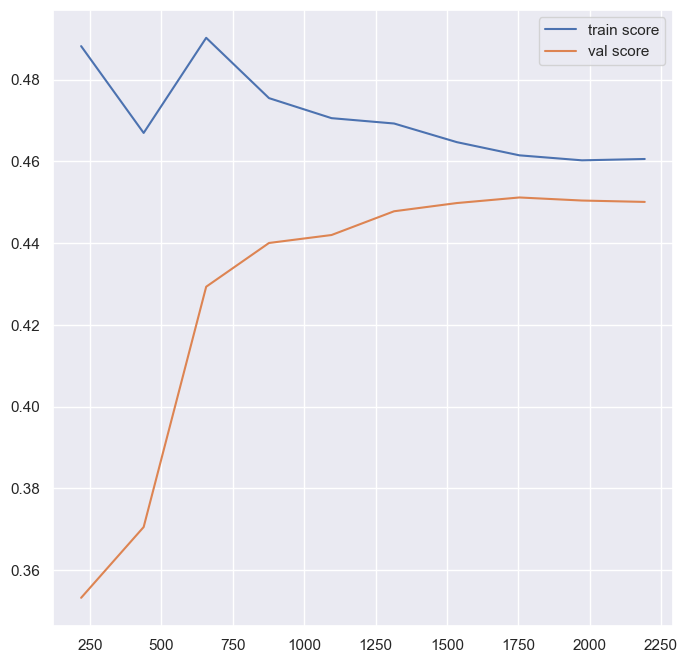

Ridge
{'alpha': 46.41588833612773} 

Ridge(alpha=46.41588833612773) 

R2 : 0.4506884506516428 

MAE : -0.6133818077114188 

RMSE : -0.6133818077114188 



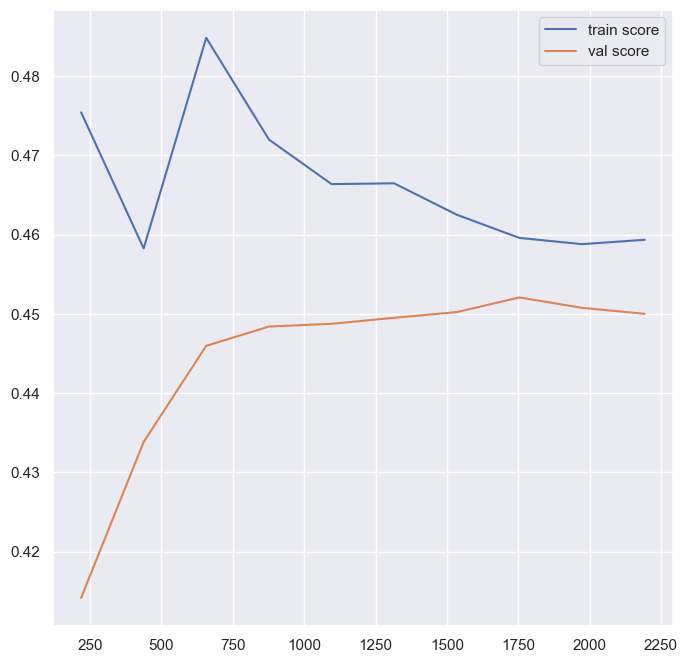

Lasso
{'alpha': 0.004641588833612777} 

Lasso(alpha=0.004641588833612777) 

R2 : 0.4526578120109834 

MAE : -0.613580733838664 

RMSE : -0.613580733838664 



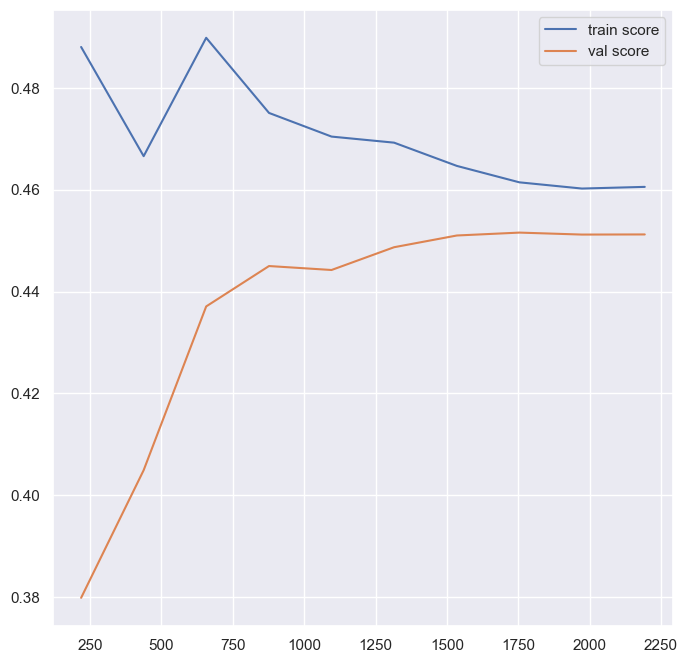

TreeReg
{'min_samples_leaf': 54} 

DecisionTreeRegressor(min_samples_leaf=54, random_state=3) 

R2 : 0.5102599326746423 

MAE : -0.5531834321180945 

RMSE : -0.5531834321180945 



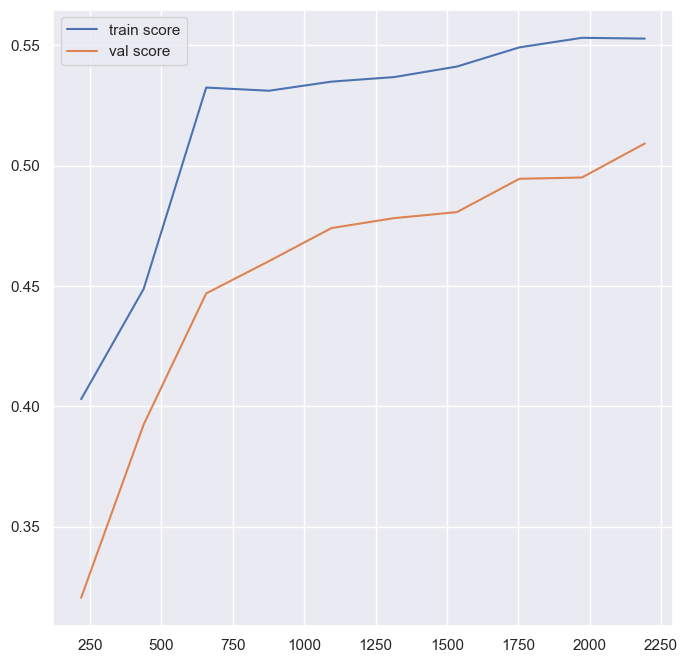

Forest_reg
{'min_samples_leaf': 10, 'n_estimators': 85} 

RandomForestRegressor(min_samples_leaf=10, n_estimators=85, random_state=3) 

R2 : 0.5364004172735461 

MAE : -0.5317233420782146 

RMSE : -0.5317233420782146 



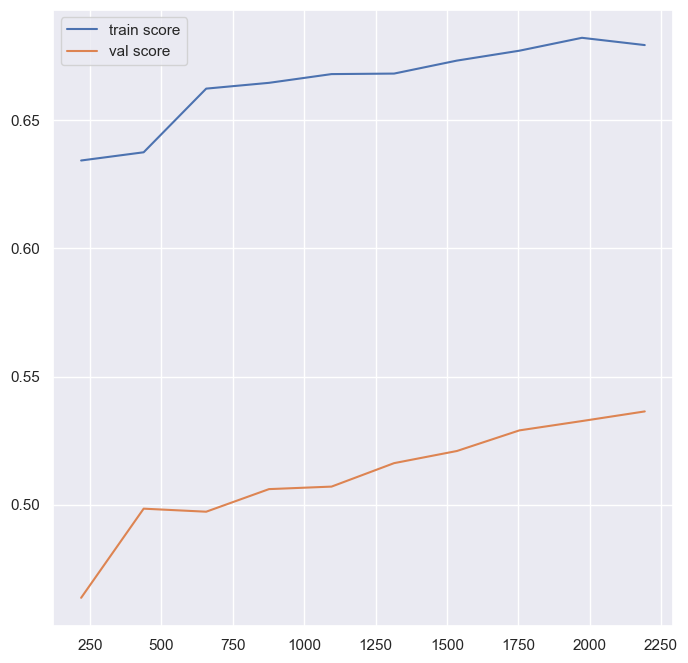

knn_reg
{'n_neighbors': 15} 

KNeighborsRegressor(n_neighbors=15) 

R2 : 0.49408417266808086 

MAE : -0.5588177091120242 

RMSE : -0.5588177091120242 



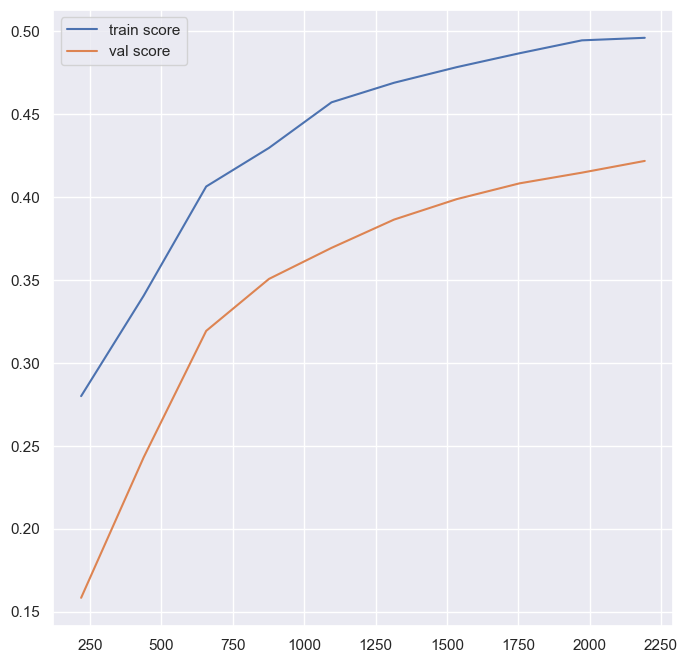

In [26]:
for model in models:
    print(model)
    models[model].fit(xtrain,ytrain)
    print(models[model].best_params_, '\n')
    print(models[model].best_estimator_, '\n')
    resultat = cross_validate(models[model].best_estimator_,xtrain, ytrain, cv=5, scoring=scores)
                              
    print('R2 :', resultat['test_R2'].mean(),'\n')
    print('MAE :', resultat['test_MAE'].mean(),'\n')
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    
    N, train_score, val_score = learning_curve(models[model].best_estimator_, x_train, y_train, cv= 5,
                                           scoring = 'r2',
                                          train_sizes = np.linspace(0.1, 1, 10))

    plt.figure(figsize=(8,8))
    plt.plot(N, train_score.mean(axis = 1), label='train score')
    plt.plot(N, val_score.mean(axis = 1), label='val score')
    plt.legend()
    plt.show()

#### Meilleurs combinaisons de variables var

In [27]:
from sklearn.feature_selection import RFECV

var_retenus_quant = []
score_finale = []

for model in models:
    if model == 'knn_reg': 
        break
    print(model)
    
    selector=RFECV(models[model].best_estimator_,cv=5, scoring='r2', n_jobs=5)
    selector = selector.fit(xtrain, ytrain)
    
    vars = xtrain.columns[selector.support_]
    print(vars)
    var_retenus_quant.append(vars.tolist())
    
    resultat = cross_validate(models[model].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    score_finale.append({'R2':resultat['test_R2'].mean(), 'MAE':resultat['test_MAE'].mean(),'RMSE':resultat['test_RMSE'].mean()})
    
    resultat = cross_validate(models['knn_reg'].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('Avec kNN')
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')

Regression
Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')
R2 : 0.450231399195337
MAE : -0.6132955117388688
RMSE : -0.6132955117388688 

Avec kNN
R2 : 0.49408417266808086
MAE : -0.5588177091120242
RMSE : -0.5588177091120242 

Ridge
Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')
R2 : 0.4506884506516428
MAE : -0.6133818077114188
RMSE : -0.6133818077114188 

Avec kNN
R2 : 0.49408417266808086
MAE : -0.5588177091120242
RMSE : -0.5588177091120242 

Lasso
Index(['YearBuilt', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 

#### Notes: les forêts aléatoires produisent les meilleurs performances

#### Modelisation with only cat variables

In [28]:
def cat_features_eng(df, target, features_cat):
    df = df.loc[:,[target]+features_cat]
    df.loc[:, features_cat] = df[features_cat].replace('NAN', np.nan)
    df.loc[:, features_cat] = df[features_cat].replace('NaN', np.nan)
    
    df['ComplianceStatus'].where(df['ComplianceStatus'] == 'COMPLIANT', 'NON_COMPLIANT', inplace=True)

    #df.loc[:,'ThirdLargestPropertyUseType'] = np.where(df['ThirdLargestPropertyUseType'].isna(),'NC',df['ThirdLargestPropertyUseType'])
    df.loc[:,'ThirdLargestPropertyUseType'] = np.where(df['ThirdLargestPropertyUseType'].isin(['RETAIL STORE','OFFICE','PARKING','RESTAURANT',np.nan]),df['ThirdLargestPropertyUseType'], 'OTHER')

    #df.loc[:,'SecondLargestPropertyUseType'] = np.where(df['SecondLargestPropertyUseType'].isna(),'NC', df['SecondLargestPropertyUseType'])
    df.loc[:,'SecondLargestPropertyUseType'] = np.where(df['SecondLargestPropertyUseType'].isin(['PARKING','OFFICE','RETAIL STORE', np.nan]), df['SecondLargestPropertyUseType'], 'OTHER')

    df.loc[:,'LargestPropertyUseType'] = np.where(df['LargestPropertyUseType'].isin(['MULTIFAMILY HOUSING','OFFICE','NON-REFRIGERATED WAREHOUSE','K-12 SCHOOL', np.nan]), df['SecondLargestPropertyUseType'], 'OTHER')

    df.loc[:,'PrimaryPropertyType'] = np.where(df['PrimaryPropertyType'].isin(['LOW-RISE MULTIFAMILY','MID-RISE MULTIFAMILY','SMALL- AND MID-SIZED OFFICE', np.nan]), df['PrimaryPropertyType'], 'OTHER')

    df['Neighborhood'].where(df['Neighborhood'] != 'DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
    
    return df

def var_dummy(df, features_cat):
    modalite_to_del = []
    for col in features_cat:
        low_i = df[col].value_counts().argmin()
        low = df[col].value_counts().index[low_i]
        modalite_to_del.append(col+'_'+str(low))
        
    df = pd.get_dummies(df, prefix=features_cat, columns=features_cat)
    #Suppression de des modalités les moins fréquentes
    for col in modalite_to_del:
        df.drop(col, axis=1, inplace=True)
    return df

def imputation_cat(df,target):
    ##### Variables qaunt ########
    imp_most = SimpleImputer(missing_values=np.nan, strategy='most_frequent', add_indicator=False)  #0.049444603639382634
    df.loc[:,df.columns[df.columns!=target]] = imp_most.fit_transform(df.loc[:,df.columns[df.columns!=target]])
    return df

def first_preprocessing_var_cat(df,target, features_cat):
    dfx = df.copy()
    dfx = cat_features_eng(dfx, target, features_cat)
    dfx = imputation_cat(dfx, target)   
    dfx = var_dummy(dfx, features_cat)
    return dfx

def last_preprocessing_var_cat(df, target, features_cat):
    dfx = df.copy()
    dfx = dfx.dropna(subset=[target])
    dfx.loc[:,[target]] = np.log(1+dfx.loc[:,[target]])
    X = dfx.drop(target, axis=1)
    y = dfx[target].values.reshape((-1,1))
    
    return X,y

In [29]:
dm_prime = first_preprocessing_var_cat(dm, var_target[1], var_cat)
df_train, df_test = train_test_split(dm_prime, test_size=0.2, stratify=dm['group'], random_state=3)

In [30]:
df_train.iloc[:,1:].isna().sum()

CouncilDistrictCode_1                       0
CouncilDistrictCode_2                       0
CouncilDistrictCode_3                       0
CouncilDistrictCode_4                       0
CouncilDistrictCode_5                       0
CouncilDistrictCode_7                       0
BuildingType_CAMPUS                         0
BuildingType_MULTIFAMILY HR (10+)           0
BuildingType_MULTIFAMILY LR (1-4)           0
BuildingType_MULTIFAMILY MR (5-9)           0
BuildingType_NONRESIDENTIAL                 0
BuildingType_NONRESIDENTIAL COS             0
BuildingType_SPS-DISTRICT K-12              0
PrimaryPropertyType_LOW-RISE MULTIFAMILY    0
PrimaryPropertyType_MID-RISE MULTIFAMILY    0
PrimaryPropertyType_OTHER                   0
Neighborhood_BALLARD                        0
Neighborhood_CENTRAL                        0
Neighborhood_DOWNTOWN                       0
Neighborhood_EAST                           0
Neighborhood_GREATER DUWAMISH               0
Neighborhood_LAKE UNION           

In [31]:
df_test

,TotalGHGEmissions,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_7,BuildingType_CAMPUS,BuildingType_MULTIFAMILY HR (10+),BuildingType_MULTIFAMILY LR (1-4),BuildingType_MULTIFAMILY MR (5-9),BuildingType_NONRESIDENTIAL,BuildingType_NONRESIDENTIAL COS,BuildingType_SPS-DISTRICT K-12,PrimaryPropertyType_LOW-RISE MULTIFAMILY,PrimaryPropertyType_MID-RISE MULTIFAMILY,PrimaryPropertyType_OTHER,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_OTHER,LargestPropertyUseType_PARKING,LargestPropertyUseType_RETAIL STORE,SecondLargestPropertyUseType_OFFICE,SecondLargestPropertyUseType_OTHER,SecondLargestPropertyUseType_PARKING,ThirdLargestPropertyUseType_OFFICE,ThirdLargestPropertyUseType_OTHER,ThirdLargestPropertyUseType_PARKING,ThirdLargestPropertyUseType_RETAIL STORE,DefaultData_0,ComplianceStatus_COMPLIANT
731,28.665,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1348,9.995,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1
1176,164.210,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
2974,17.325,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
167,1598.655,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,38.510,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
3067,59.665,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1
384,6.845,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
3353,9.710,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1


In [32]:
xtrain, ytrain = last_preprocessing_var_cat(df_train, var_target[1], var_cat)
xtest, ytest = last_preprocessing_var_cat(df_test, var_target[1], var_cat)

In [33]:
ytrain

array([[3.44265917],
       [5.68744982],
       [2.43317466],
       ...,
       [4.7144281 ],
       [3.42475113],
       [4.19343546]])

In [34]:
#### Standardisation
from sklearn.preprocessing import StandardScaler

scy = StandardScaler()
ytrain = scy.fit_transform(ytrain.reshape(-1, 1)).ravel()
ytest = scy.transform(ytest.reshape(-1, 1)).ravel()

In [35]:
# Model libraires
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve

models={'Regression':GridSearchCV(LinearRegression(),{},
                                  cv=5, n_jobs=4, ),
        'Ridge':GridSearchCV(Ridge(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'Lasso':GridSearchCV(Lasso(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'TreeReg':GridSearchCV(DecisionTreeRegressor(random_state=3),{'min_samples_leaf':range(2,21,2)},
                               cv=5,n_jobs=4, ),
        'Forest_reg':GridSearchCV(RandomForestRegressor(random_state=3),{'min_samples_leaf':range(2,41,2), 'n_estimators':range(85,97)},
                                  cv=5,n_jobs=6,),
        
        'knn_reg':GridSearchCV(KNeighborsRegressor(),{'n_neighbors':range(5,97,5)},
                                   cv=5,n_jobs=6,)
       }
scores = {'R2':'r2', 'MAE':'neg_mean_absolute_error', 'RMSE':'neg_mean_absolute_error'}

Regression
{} 

LinearRegression() 

R2 : 0.28314067770122053 

MAE : -0.675426990769245 

RMSE : -0.675426990769245 



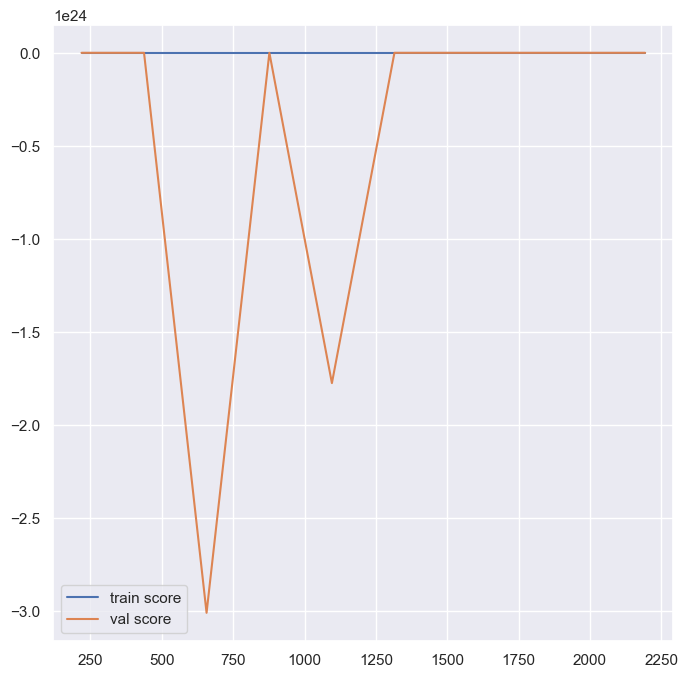

Ridge
{'alpha': 10.0} 

Ridge(alpha=10.0) 

R2 : 0.28585214596873604 

MAE : -0.6744318872897341 

RMSE : -0.6744318872897341 



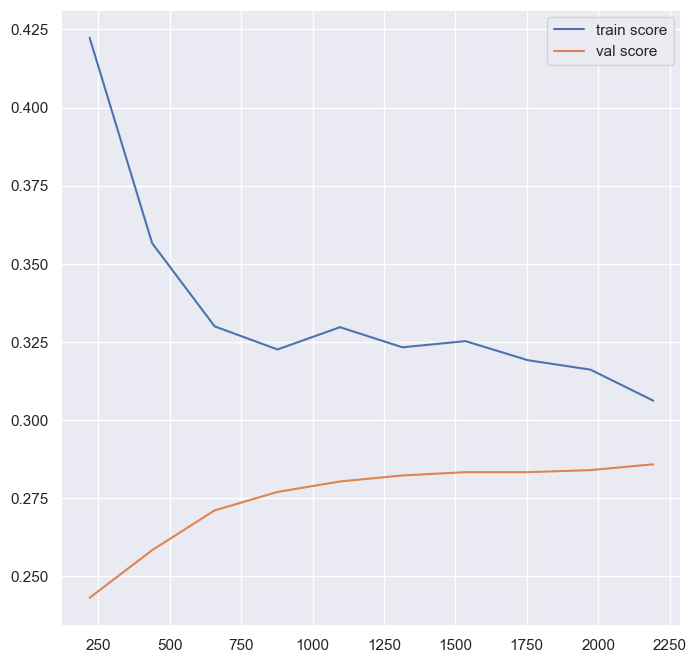

Lasso
{'alpha': 0.001} 

Lasso(alpha=0.001) 

R2 : 0.28758349510522024 

MAE : -0.6742273678830373 

RMSE : -0.6742273678830373 



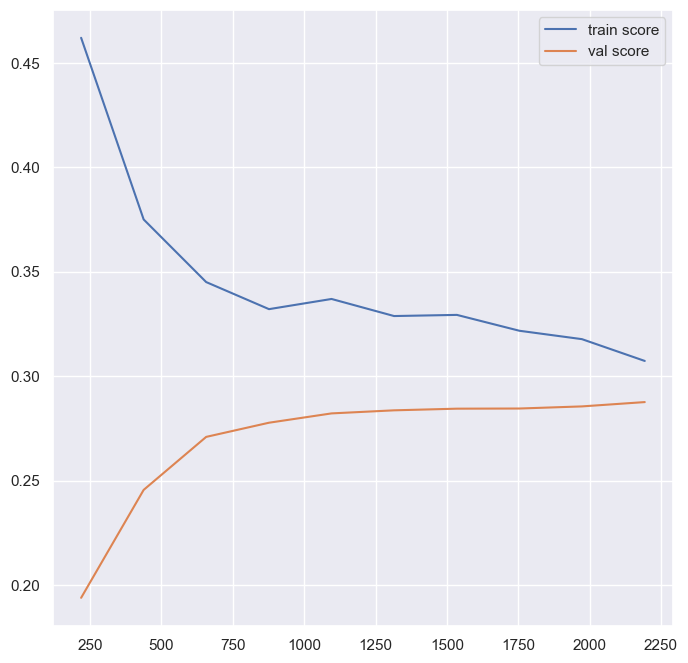

TreeReg
{'min_samples_leaf': 18} 

DecisionTreeRegressor(min_samples_leaf=18, random_state=3) 

R2 : 0.27387042915438126 

MAE : -0.6729345504220283 

RMSE : -0.6729345504220283 



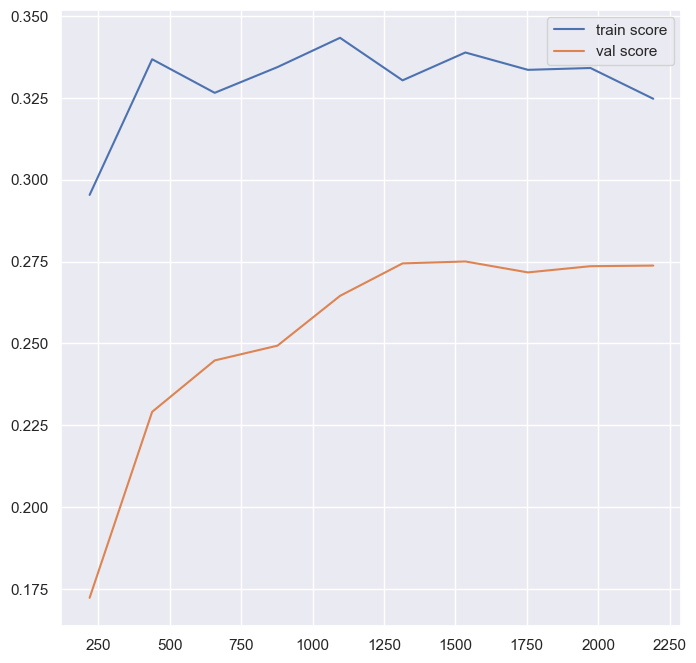

Forest_reg
{'min_samples_leaf': 10, 'n_estimators': 90} 

RandomForestRegressor(min_samples_leaf=10, n_estimators=90, random_state=3) 

R2 : 0.28713429231335497 

MAE : -0.6676018281905791 

RMSE : -0.6676018281905791 



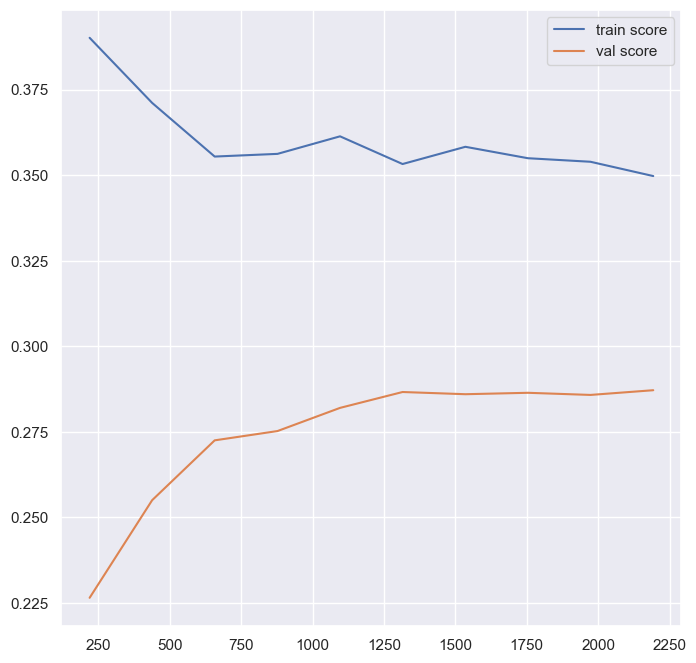

knn_reg
{'n_neighbors': 45} 

KNeighborsRegressor(n_neighbors=45) 

R2 : 0.270308047548999 

MAE : -0.6782312119093874 

RMSE : -0.6782312119093874 



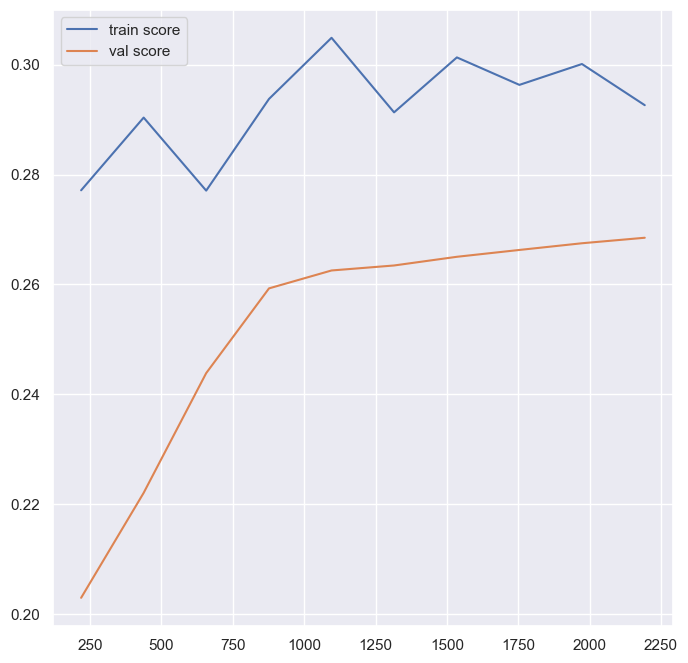

In [36]:
for model in models:
    print(model)
    models[model].fit(xtrain,ytrain)
    print(models[model].best_params_, '\n')
    print(models[model].best_estimator_, '\n')
    resultat = cross_validate(models[model].best_estimator_,xtrain, ytrain, cv=5, scoring=scores)
                              
    print('R2 :', resultat['test_R2'].mean(),'\n')
    print('MAE :', resultat['test_MAE'].mean(),'\n')
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    
    N, train_score, val_score = learning_curve(models[model].best_estimator_, xtrain, ytrain, cv= 5,
                                           scoring = 'r2',
                                          train_sizes = np.linspace(0.1, 1, 10))

    plt.figure(figsize=(8,8))
    plt.plot(N, train_score.mean(axis = 1), label='train score')
    plt.plot(N, val_score.mean(axis = 1), label='val score')
    plt.legend()
    plt.show()

In [37]:
from sklearn.feature_selection import RFECV

var_retenus_cat = []
score_finale_cat = []

for model in models:
    if model == 'knn_reg':
        break
    print(model)
    
    selector=RFECV(models[model].best_estimator_,cv=5, scoring='r2', n_jobs=5)
    selector = selector.fit(xtrain, ytrain)
    
    vars = xtrain.columns[selector.support_]
    print(vars)
    var_retenus_cat.append(vars.tolist())
    
    resultat = cross_validate(models[model].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    score_finale.append({'R2':resultat['test_R2'].mean(), 'MAE':resultat['test_MAE'].mean(),'RMSE':resultat['test_RMSE'].mean()})
    
    resultat = cross_validate(models['knn_reg'].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('Avec KNN')
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')

Regression
Index(['CouncilDistrictCode_2', 'CouncilDistrictCode_3',
       'CouncilDistrictCode_4', 'CouncilDistrictCode_7', 'BuildingType_CAMPUS',
       'BuildingType_MULTIFAMILY HR (10+)',
       'BuildingType_MULTIFAMILY LR (1-4)',
       'BuildingType_MULTIFAMILY MR (5-9)', 'BuildingType_NONRESIDENTIAL',
       'BuildingType_NONRESIDENTIAL COS', 'BuildingType_SPS-DISTRICT K-12',
       'PrimaryPropertyType_LOW-RISE MULTIFAMILY', 'PrimaryPropertyType_OTHER',
       'Neighborhood_BALLARD', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_MAGNOLIA / QUEEN ANNE',
       'SecondLargestPropertyUseType_OTHER',
       'ThirdLargestPropertyUseType_OFFICE',
       'ThirdLargestPropertyUseType_OTHER',
       'ThirdLargestPropertyUseType_PARKING',
       'ThirdLargestPropertyUseType_RETAIL STORE',
       'ComplianceStatus_COMPLIANT'],
      dtype='object')
R2 : 0.2884857031692234
MAE : -0.6737581271226996
RMSE : -0.6737581271226996 

Avec KNN
R2 : 0.26572452686268794

In [38]:
#### Combinaison var_quant et var_cat

In [39]:
def global_preprocessing_first(df, target, features_cat, features_quant):
    df1 = first_preprocessing_var_cat(df, target, features_cat)
    df1 = pd.concat([df1,df[features_quant]], axis=1)    
    return df1

def global_preprocessing_last(df, target, features_cat, features_quant):
    X1, Y1 = last_preprocessing_var_cat(df, target, features_cat)
    X2, Y = preprocessing_quant(df, target, features_quant)
    X1.loc[:,var_quant] = X2
    #X = pd.concat([X1, X2], axis=1)
    return X1,Y

In [40]:
dm.shape

(3432, 40)

In [41]:
data = global_preprocessing_first(dm, var_target[1], var_cat, var_quant)
df_train, df_test = train_test_split(data, test_size=0.2, stratify=dm['group'], random_state=3)

In [42]:
data.shape

(3432, 49)

In [43]:
df_train.isna().sum()

TotalGHGEmissions                              3
CouncilDistrictCode_1                          0
CouncilDistrictCode_2                          0
CouncilDistrictCode_3                          0
CouncilDistrictCode_4                          0
CouncilDistrictCode_5                          0
CouncilDistrictCode_7                          0
BuildingType_CAMPUS                            0
BuildingType_MULTIFAMILY HR (10+)              0
BuildingType_MULTIFAMILY LR (1-4)              0
BuildingType_MULTIFAMILY MR (5-9)              0
BuildingType_NONRESIDENTIAL                    0
BuildingType_NONRESIDENTIAL COS                0
BuildingType_SPS-DISTRICT K-12                 0
PrimaryPropertyType_LOW-RISE MULTIFAMILY       0
PrimaryPropertyType_MID-RISE MULTIFAMILY       0
PrimaryPropertyType_OTHER                      0
Neighborhood_BALLARD                           0
Neighborhood_CENTRAL                           0
Neighborhood_DOWNTOWN                          0
Neighborhood_EAST   

In [44]:
Xtrain, Ytrain = global_preprocessing_last(df_train, var_target[1], var_cat, var_quant)
Xtest, Ytest = global_preprocessing_last(df_test, var_target[1], var_cat, var_quant)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [45]:
Xtrain.isna().sum().sort_values(ascending=False)

CouncilDistrictCode_1                       0
CouncilDistrictCode_2                       0
Neighborhood_SOUTHEAST                      0
Neighborhood_SOUTHWEST                      0
LargestPropertyUseType_OTHER                0
LargestPropertyUseType_PARKING              0
LargestPropertyUseType_RETAIL STORE         0
SecondLargestPropertyUseType_OFFICE         0
SecondLargestPropertyUseType_OTHER          0
SecondLargestPropertyUseType_PARKING        0
ThirdLargestPropertyUseType_OFFICE          0
ThirdLargestPropertyUseType_OTHER           0
ThirdLargestPropertyUseType_PARKING         0
ThirdLargestPropertyUseType_RETAIL STORE    0
DefaultData_0                               0
ComplianceStatus_COMPLIANT                  0
YearBuilt                                   0
NumberofBuildings                           0
NumberofFloors                              0
PropertyGFATotal                            0
PropertyGFABuilding(s)                      0
LargestPropertyUseTypeGFA         

In [46]:
#### Standardisation
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()

Xtrain.loc[:,:] = scx.fit_transform(Xtrain)
Xtest.loc[:,:]  = scx.transform(Xtest)

Ytrain = scy.fit_transform(Ytrain.values.reshape(-1, 1)).ravel()
Ytest = scy.transform(Ytest.values.reshape(-1, 1)).ravel()

### Performance sur les subsets RFECV quant+cat

In [47]:
##Selection des best features par REFCV

In [48]:
# Model libraires
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve

models={'Regression':GridSearchCV(LinearRegression(),{},
                                  cv=5, n_jobs=4, ),
        'Ridge':GridSearchCV(Ridge(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'Lasso':GridSearchCV(Lasso(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'TreeReg':GridSearchCV(DecisionTreeRegressor(random_state=3),{'min_samples_leaf':range(20,41,2)},
                               cv=5,n_jobs=4, ),
        'Forest_reg':GridSearchCV(RandomForestRegressor(random_state=3),{'min_samples_leaf':range(2,41,2), 'n_estimators':range(2,97,5)},
                                  cv=5,n_jobs=6,),
        'knn_reg':GridSearchCV(KNeighborsRegressor(),{'n_neighbors':range(5,97,5)},
                                   cv=5,n_jobs=6,)
       }
scores = {'R2':'r2', 'MAE':'neg_mean_absolute_error', 'RMSE':'neg_mean_absolute_error'}

Regression
{} 

LinearRegression() 

R2 : 0.5336352869374139 

MAE : -0.5552078173713924 

RMSE : -0.5552078173713924 



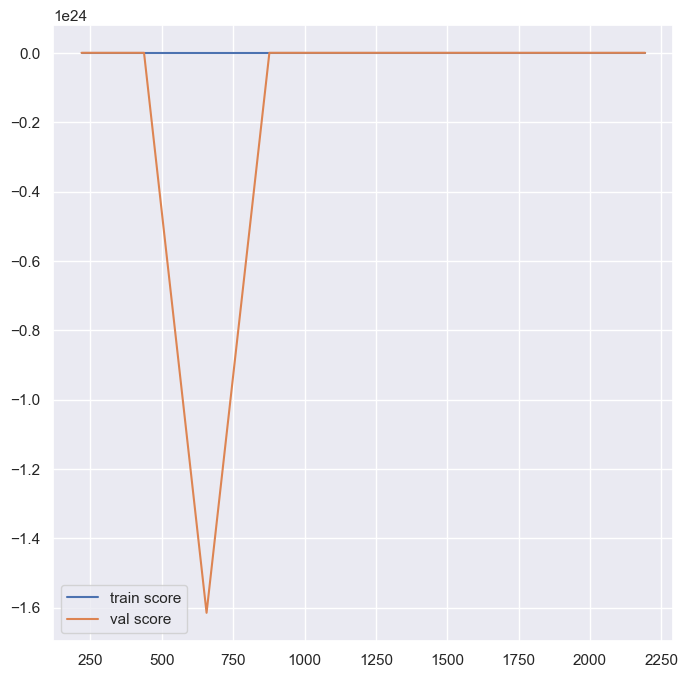

Ridge
{'alpha': 46.41588833612773} 

Ridge(alpha=46.41588833612773) 

R2 : 0.5402205983653006 

MAE : -0.5518915281951803 

RMSE : -0.5518915281951803 



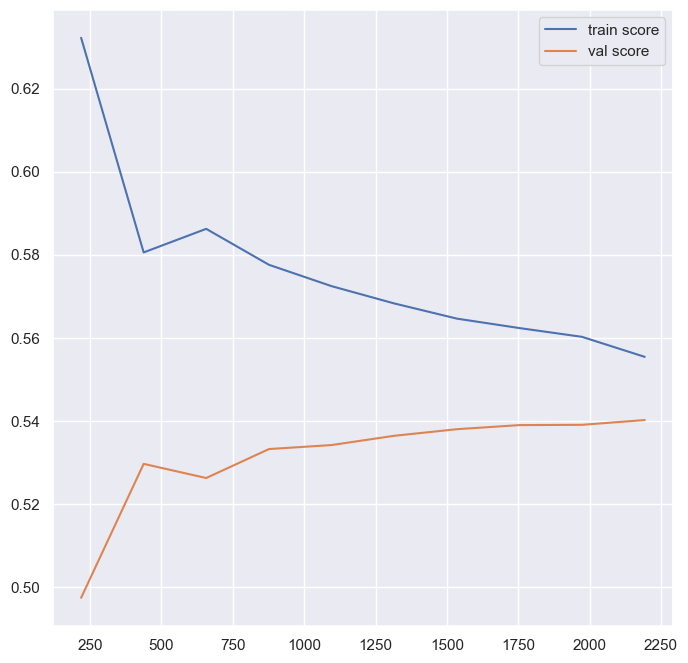

Lasso
{'alpha': 0.004641588833612777} 

Lasso(alpha=0.004641588833612777) 

R2 : 0.5378281877385389 

MAE : -0.5530555893426987 

RMSE : -0.5530555893426987 



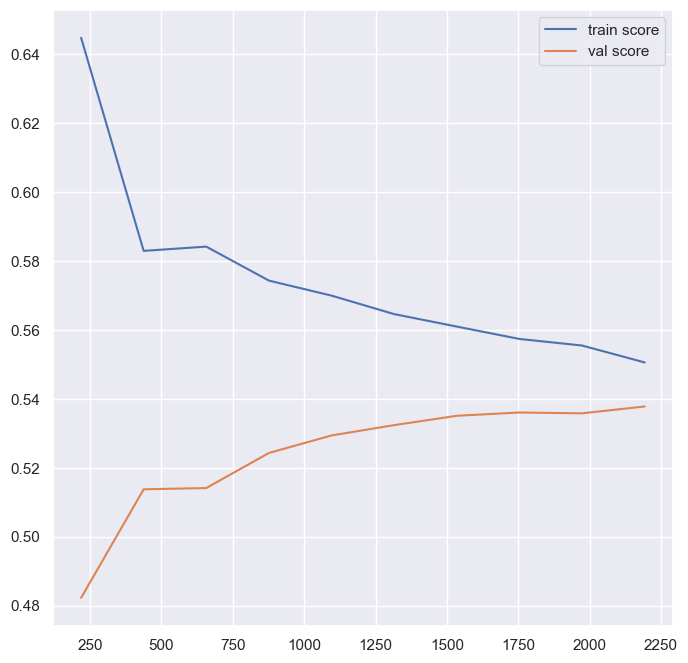

TreeReg
{'min_samples_leaf': 32} 

DecisionTreeRegressor(min_samples_leaf=32, random_state=3) 

R2 : 0.5360536674207463 

MAE : -0.5286673938010671 

RMSE : -0.5286673938010671 



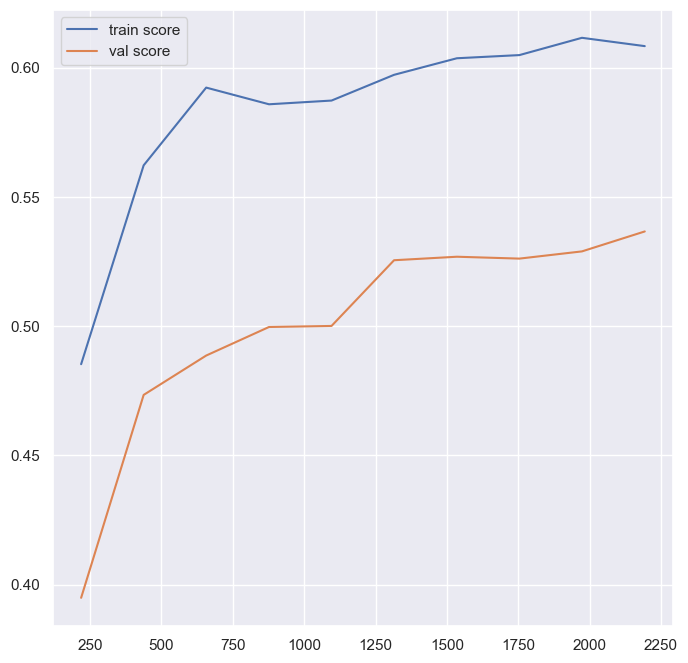

Forest_reg
{'min_samples_leaf': 4, 'n_estimators': 87} 

RandomForestRegressor(min_samples_leaf=4, n_estimators=87, random_state=3) 

R2 : 0.5806092427093719 

MAE : -0.4983526072352305 

RMSE : -0.4983526072352305 



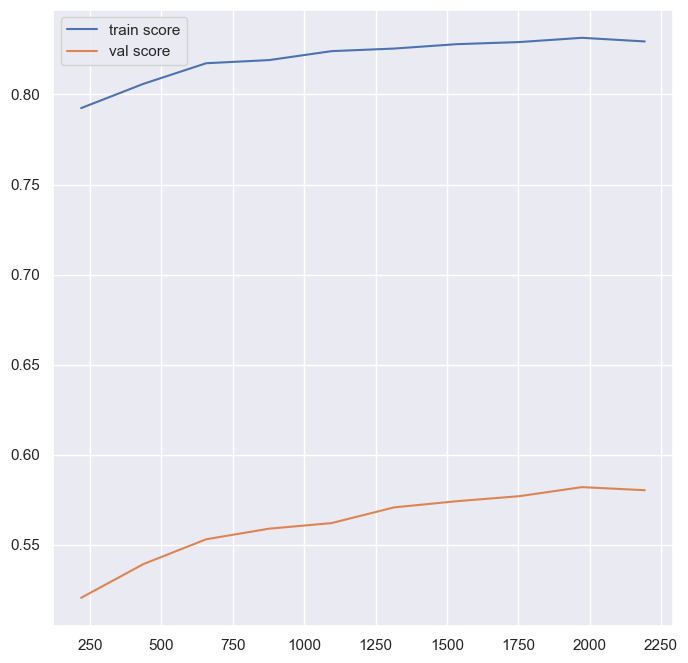

knn_reg
{'n_neighbors': 10} 

KNeighborsRegressor(n_neighbors=10) 

R2 : 0.45059471075926927 

MAE : -0.5810727874161433 

RMSE : -0.5810727874161433 



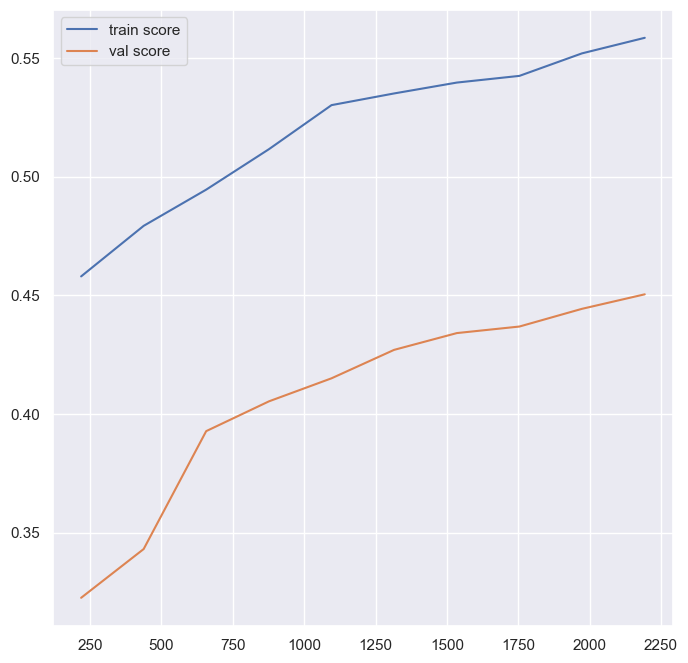

In [49]:
for i in range(len(models)):
    if i == len(models)-1:
        x = Xtrain
    else:
        x = Xtrain[var_retenus_quant[i]+ var_retenus_cat[i]]
    
    print(list(models.keys())[i])
    model = list(models.keys())[i]
    models[model].fit(x,Ytrain)
    print(models[model].best_params_, '\n')
    print(models[model].best_estimator_, '\n')
    resultat = cross_validate(models[model].best_estimator_,x, Ytrain, cv=5, scoring=scores)
                              
    print('R2 :', resultat['test_R2'].mean(),'\n')
    print('MAE :', resultat['test_MAE'].mean(),'\n')
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    
    N, train_score, val_score = learning_curve(models[model].best_estimator_, x, Ytrain, cv= 5,
                                           scoring = 'r2',
                                          train_sizes = np.linspace(0.1, 1, 10))

    plt.figure(figsize=(8,8))
    plt.plot(N, train_score.mean(axis = 1), label='train score')
    plt.plot(N, val_score.mean(axis = 1), label='val score')
    plt.legend()
    plt.show()
    

#### Réduction de variables

In [50]:
from sklearn.feature_selection import RFECV

var_retenus_all = []
score_finale_all = []

for i in range(len(models)):
    
    if i == len(models)-1:
        break
        
    print(list(models.keys())[i])
    model = list(models.keys())[i]
    
    x = Xtrain[var_retenus_quant[i]+ var_retenus_cat[i]]
    selector=RFECV(models[model].best_estimator_,cv=5, scoring='r2', n_jobs=5)
    
    selector = selector.fit(x, Ytrain)
    
    vars = x.columns[selector.support_]
    print(vars)
    print(len(vars))
    var_retenus_all.append(vars.tolist())
    
    resultat = cross_validate(models[model].best_estimator_,x[vars], Ytrain, cv=5, scoring=scores)
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    score_finale.append({'R2':resultat['test_R2'].mean(), 'MAE':resultat['test_MAE'].mean(),'RMSE':resultat['test_RMSE'].mean()})
    
    resultat = cross_validate(models['knn_reg'].best_estimator_,x[vars], Ytrain, cv=5, scoring=scores)
    print('Avec KNN')
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')

Regression
Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'CouncilDistrictCode_2', 'CouncilDistrictCode_3',
       'CouncilDistrictCode_4', 'CouncilDistrictCode_7', 'BuildingType_CAMPUS',
       'BuildingType_MULTIFAMILY HR (10+)',
       'BuildingType_MULTIFAMILY LR (1-4)',
       'BuildingType_MULTIFAMILY MR (5-9)', 'BuildingType_NONRESIDENTIAL',
       'BuildingType_NONRESIDENTIAL COS', 'BuildingType_SPS-DISTRICT K-12',
       'PrimaryPropertyType_LOW-RISE MULTIFAMILY', 'PrimaryPropertyType_OTHER',
       'Neighborhood_BALLARD', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_MAGNOLIA / QUEEN ANNE',
       'SecondLargestPropertyUseType_OTHER',
       'ThirdLargestPropertyUseType_OFFICE',
       'ThirdLargestPropertyUseType_OTHER',
       'ThirdLargestPropertyUseType_PARKING',
      

In [51]:
#### Application des modèles sur test set

In [52]:
from sklearn.dummy import DummyRegressor
base_mean = DummyRegressor(strategy='mean')
base_med = DummyRegressor(strategy='median')

base_mean.fit(Xtrain, Ytrain)
base_med.fit(Xtrain, Ytrain)
y_alea = np.random.randint(np.min(Ytrain), np.max(Ytrain), Ytest.shape)

In [55]:
print('Avec une prédiction à la moyenne')
print('R2 :', r2_score(Ytest,base_mean.predict(Xtest)),)
print('MAE :', mean_absolute_error(Ytest,base_mean.predict(Xtest)),)
print('RMSE :',mean_squared_error(Ytest,base_mean.predict(Xtest), squared=False),'\n')

print('Avec une prédiction à la mediane')
print('R2 :', r2_score(Ytest,base_med.predict(Xtest)),)
print('MAE :', mean_absolute_error(Ytest,base_med.predict(Xtest)),)
print('RMSE :',mean_squared_error(Ytest,base_med.predict(Xtest), squared=False),'\n')

print('Avec une prédiction alétoire')
print('R2 :', r2_score(Ytest, y_alea))
print('MAE :', mean_absolute_error(Ytest,y_alea))
print('RMSE :',mean_squared_error(Ytest,y_alea, squared=False), '\n')

Avec une prédiction à la moyenne
R2 : -1.1205974730366108e-06
MAE : 0.8101476980995024
RMSE : 0.987603467876298 

Avec une prédiction à la mediane
R2 : -0.00026116098435702284
MAE : 0.8103992865523935
RMSE : 0.9877318677796031 

Avec une prédiction alétoire
R2 : -3.3143439700754778
MAE : 1.6879501932430927
RMSE : 2.0513499091714587 



In [54]:
for i in range(len(models)):

    print(list(models.keys())[i])
    model = list(models.keys())[i]
    
    if i == len(models)-1:
        i = i-3
    x = Xtrain[var_retenus_all[i]]
    
    models[model].fit(x,Ytrain)
    models['knn_reg'].fit(x,Ytrain)
    
    print(models[model].best_params_)
    print(models[model].best_estimator_,'\n')
                              
    print('R2 :', r2_score(Ytest,models[model].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('MAE :', mean_absolute_error(Ytest,models[model].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('RMSE :',mean_squared_error(Ytest,models[model].best_estimator_.predict(Xtest[var_retenus_all[i]]), squared=False),'\n')
    
    print('Avec une knn')
    print('R2 :', r2_score(Ytest,models['knn_reg'].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('MAE :', mean_absolute_error(Ytest,models['knn_reg'].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('RMSE :',mean_squared_error(Ytest,models['knn_reg'].best_estimator_.predict(Xtest[var_retenus_all[i]]), squared=False),'\n')
        
    print('*********************************')


Regression
{}
LinearRegression() 

R2 : 0.4950729798103046
MAE : 0.5624874178105956
RMSE : 0.7017730220087591 

Avec une knn
R2 : 0.47681582761242547
MAE : 0.5409514528612547
RMSE : 0.7143477175470875 

*********************************
Ridge
{'alpha': 215.44346900318823}
Ridge(alpha=215.44346900318823) 

R2 : 0.5041043764490535
MAE : 0.5563562672846599
RMSE : 0.6954685584251274 

Avec une knn
R2 : 0.45981099129996184
MAE : 0.556323563233831
RMSE : 0.7258639614234275 

*********************************
Lasso
{'alpha': 0.001}
Lasso(alpha=0.001) 

R2 : 0.49789324705761673
MAE : 0.5591879861422199
RMSE : 0.6998104028376466 

Avec une knn
R2 : 0.5193924787433088
MAE : 0.5249532767444582
RMSE : 0.6846642386540864 

*********************************
TreeReg
{'min_samples_leaf': 32}
DecisionTreeRegressor(min_samples_leaf=32, random_state=3) 

R2 : 0.4985511553537054
MAE : 0.5320829654388068
RMSE : 0.6993517732886887 

Avec une knn
R2 : 0.5421217905090379
MAE : 0.5100938065870207
RMSE : 0.6682